# Understanding Soundscape Analysis: Concepts and Terminology

## Introduction

Welcome to this tutorial on understanding soundscape analysis using the `Soundscapy` Python package. Before diving into code and analysis techniques, it's important to understand the fundamental concepts and terminology in soundscape research. This tutorial provides a theoretical foundation that will help you better understand why and how we analyze soundscapes.

### Learning Objectives

By the end of this tutorial, you will be able to:
- Define what a soundscape is and why it's important
- Understand the ISO 12913 standard for soundscape assessment
- Explain the perceptual attributes used in soundscape evaluation
- Describe the circumplex model of soundscape perception
- Interpret ISOPleasant and ISOEventful coordinates
- Understand why distributions matter in soundscape analysis

Let's begin by importing the necessary libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import soundscapy as sspy
from soundscapy.databases import isd
from soundscapy.surveys import LANGUAGE_ANGLES, PAQ_IDS, PAQ_LABELS

## 1. What is a Soundscape?

The term "soundscape" refers to the acoustic environment as perceived, experienced, and/or understood by people, in context. Unlike traditional acoustic measurements that focus solely on sound levels (e.g., decibels), soundscape research considers how people perceive and interpret sounds in their environment.

The ISO 12913-1:2014 standard defines a soundscape as:

> "An acoustic environment as perceived or experienced and/or understood by a person or people, in context."

This definition emphasizes three key aspects:
1. **Perception**: How people subjectively experience sounds
2. **Context**: The physical, social, and cultural environment in which sounds occur
3. **Understanding**: How people interpret and make meaning from sounds

### Why Soundscapes Matter

Soundscape research is important for several reasons:

- **Urban Planning**: Helps create more livable cities by considering how acoustic environments affect residents
- **Public Health**: Poor soundscapes can contribute to stress, sleep disturbance, and other health issues
- **Environmental Quality**: Soundscapes are an important aspect of environmental quality and biodiversity
- **Cultural Heritage**: Soundscapes can be part of cultural identity and heritage
- **User Experience**: In designed spaces, soundscapes contribute significantly to overall experience

Traditional noise control approaches focus on reducing sound levels, but soundscape research recognizes that not all sounds are unwanted. Some sounds (like birdsong or flowing water) may be desirable even at higher levels, while others (like mechanical noise) may be annoying even at lower levels.

## 2. The ISO 12913 Standard

The International Organization for Standardization (ISO) has developed a series of standards for soundscape assessment:

- **ISO 12913-1:2014**: Defines the concept of soundscape and its framework
- **ISO 12913-2:2018**: Provides methods for collecting soundscape data
- **ISO 12913-3:2019**: Describes data analysis methods for soundscape studies

These standards provide a common framework and methodology for soundscape research, making studies more comparable and reproducible. The `Soundscapy` package is designed to align with these standards, particularly ISO 12913-2 and ISO 12913-3.

### ISO 12913-2: Data Collection

ISO 12913-2 recommends collecting both perceptual data (how people experience the soundscape) and acoustic data (objective measurements of the sound environment). For perceptual data, it suggests using standardized questionnaires that include:

- Perceived Affective Quality (PAQ) scales
- Overall soundscape quality assessment
- Sound source identification and dominance
- Contextual factors

### ISO 12913-3: Data Analysis

ISO 12913-3 provides guidelines for analyzing soundscape data, including:

- Statistical analysis of perceptual data
- Correlation between perceptual and acoustic data
- Visualization techniques
- Reporting methods

The `Soundscapy` package implements many of these recommended analysis methods, making it easier to conduct ISO-compliant soundscape research.

## 3. Perceptual Attributes (PAQs)

Perceived Affective Quality (PAQ) scales are a key component of soundscape assessment. These scales measure how people perceive the emotional qualities of a soundscape. The ISO 12913-2 standard recommends using eight bipolar scales:

1. **Pleasant** vs. Unpleasant
2. **Vibrant** vs. Monotonous
3. **Eventful** vs. Uneventful
4. **Chaotic** vs. Calm
5. **Annoying** vs. Not annoying
6. **Monotonous** vs. Exciting
7. **Uneventful** vs. Full of events
8. **Calm** vs. Chaotic

These scales are typically measured using 5-point Likert scales, where respondents rate their agreement with each attribute.

Let's look at how these PAQs are defined in Soundscapy:

In [2]:
# Display the PAQ IDs and labels
print("PAQ IDs:")
print(PAQ_IDS)
print("\nPAQ Labels:")
print(PAQ_LABELS)

PAQ IDs:
['PAQ1', 'PAQ2', 'PAQ3', 'PAQ4', 'PAQ5', 'PAQ6', 'PAQ7', 'PAQ8']

PAQ Labels:
['pleasant', 'vibrant', 'eventful', 'chaotic', 'annoying', 'monotonous', 'uneventful', 'calm']


### The Meaning of PAQs

Each PAQ captures a different aspect of how people perceive a soundscape. These attributes are not independent but are related in systematic ways, which leads us to the circumplex model of soundscape perception.

## 4. The Circumplex Model of Soundscape Perception

Research has shown that the eight PAQs can be organized into a circular structure called a "circumplex model." This model suggests that soundscape perception is primarily organized along two main dimensions:

1. **Pleasantness**: How pleasant or unpleasant the soundscape is perceived to be
2. **Eventfulness**: How eventful or uneventful the soundscape is perceived to be

The circumplex model places these dimensions at right angles to each other, creating a two-dimensional space where the eight PAQs are arranged in a circular pattern.

Let's visualize this circumplex model:

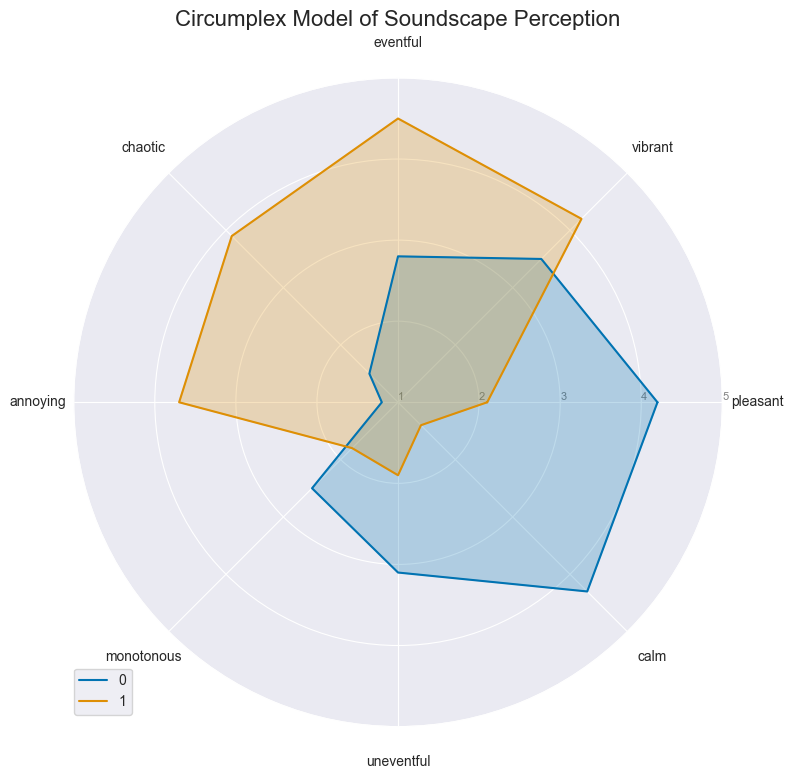

In [3]:
data = pd.DataFrame(
    {
        "Location": ["Park", "Street"],
        "pleasant": [4.2, 2.1],
        "vibrant": [3.5, 4.2],
        "eventful": [2.8, 4.5],
        "chaotic": [1.5, 3.9],
        "annoying": [1.2, 3.7],
        "monotonous": [2.5, 1.8],
        "uneventful": [3.1, 1.9],
        "calm": [4.3, 1.4],
    }
)

sspy.paq_radar_plot(data, title="Circumplex Model of Soundscape Perception")
plt.show()

### Interpreting the Circumplex Model

The circumplex model divides the perceptual space into four quadrants, each representing a different type of soundscape:

1. **Pleasant and Eventful (top-right)**: Vibrant soundscapes, often found in lively public spaces
2. **Unpleasant and Eventful (top-left)**: Chaotic soundscapes, often found in noisy urban areas
3. **Unpleasant and Uneventful (bottom-left)**: Monotonous soundscapes, often found in boring or lifeless spaces
4. **Pleasant and Uneventful (bottom-right)**: Calm soundscapes, often found in tranquil natural environments

This model helps us understand that soundscape quality isn't just about pleasantness—eventfulness also plays an important role. Some contexts call for vibrant soundscapes (like entertainment districts), while others benefit from calm soundscapes (like residential areas or parks).

## 5. ISOPleasant and ISOEventful Coordinates

To quantify a soundscape's position in the circumplex model, we calculate two coordinates:

1. **ISOPleasant**: A value between -1 and 1 representing the soundscape's position on the pleasantness dimension
2. **ISOEventful**: A value between -1 and 1 representing the soundscape's position on the eventfulness dimension

These coordinates are calculated from the eight PAQ ratings using a projection method. Each PAQ contributes to both coordinates based on its position in the circumplex.

Let's look at how these coordinates are calculated in Soundscapy:

In [4]:
# Load a sample dataset
data = isd.load()

# Display a few rows of PAQ data
sample_data = data[PAQ_IDS].head(5)
print("Sample PAQ data:")
print(sample_data)

# Calculate ISO coordinates for the sample data
iso_pleasant, iso_eventful = sspy.surveys.calculate_iso_coords(sample_data)

# Display the calculated coordinates
print("\nCalculated ISO coordinates:")
result_df = pd.DataFrame(
    {"ISOPleasant": iso_pleasant.round(3), "ISOEventful": iso_eventful.round(3)}
)
result_df

Sample PAQ data:
   PAQ1  PAQ2  PAQ3  PAQ4  PAQ5  PAQ6  PAQ7  PAQ8
0   2.0   4.0   2.0   1.0   2.0   2.0   4.0   2.0
1   2.0   4.0   4.0   4.0   4.0   4.0   1.0   1.0
2   5.0   3.0   3.0   1.0   2.0   1.0   3.0   4.0
3   5.0   3.0   3.0   1.0   2.0   2.0   3.0   4.0
4   5.0   3.0   3.0   2.0   2.0   3.0   3.0   4.0

Calculated ISO coordinates:


,ISOPleasant,ISOEventful
0,0.220,-0.134
1,-0.427,0.530
2,0.677,-0.073
3,0.604,-0.146
4,0.457,-0.146


### The Mathematics Behind ISO Coordinates

The calculation of ISO coordinates involves projecting the PAQ ratings onto the pleasantness and eventfulness dimensions. The basic formula is:

$$\text{ISOPleasant} = \frac{\sum_{i=1}^{8} \text{PAQ}_i \cdot \cos(\theta_i)}{\text{normalization factor}}$$

$$\text{ISOEventful} = \frac{\sum_{i=1}^{8} \text{PAQ}_i \cdot \sin(\theta_i)}{\text{normalization factor}}$$

Where:
- $\text{PAQ}_i$ is the rating for the $i$-th PAQ (adjusted to center around 0)
- $\theta_i$ is the angle of the $i$-th PAQ in the circumplex (in radians)
- The normalization factor ensures that the coordinates fall between -1 and 1

In Soundscapy, these calculations are implemented in the `calculate_iso_coords` function, which we just demonstrated above.

### Language-Specific Angles

Research has shown that the exact angles of PAQs in the circumplex can vary slightly across different languages and cultures. Soundscapy accounts for this by providing language-specific angles:

In [5]:
# Display the language-specific angles
print("Language-specific angles:")
for language, angles in LANGUAGE_ANGLES.items():
    print(f"{language}: {angles}")

Language-specific angles:
eng: (0, 46, 94, 138, 177, 241, 275, 340)
arb: (0, 36, 45, 135, 167, 201, 242, 308)
cmn: (0, 18, 38, 154, 171, 196, 217, 318)
hrv: (0, 84, 93, 160, 173, 243, 273, 354)
nld: (0, 43, 111, 125, 174, 257, 307, 341)
deu: (0, 64, 97, 132, 182, 254, 282, 336)
ell: (0, 72, 86, 133, 161, 233, 267, 328)
ind: (0, 53, 104, 123, 139, 202, 284, 308)
ita: (0, 57, 104, 143, 170, 274, 285, 336)
spa: (0, 41, 103, 147, 174, 238, 279, 332)
swe: (0, 66, 87, 146, 175, 249, 275, 335)
tur: (0, 55, 97, 106, 157, 254, 289, 313)


Using these language-specific angles can improve the accuracy of ISO coordinate calculations, especially when working with multilingual datasets.

## 6. Why Distributions Matter in Soundscape Analysis

When analyzing soundscapes, it's important to consider not just average perceptions but the full distribution of perceptions. This is because:

1. **Individual Variation**: People perceive soundscapes differently based on their preferences, expectations, and sensitivities
2. **Temporal Variation**: Soundscapes change over time, and a single location may have different acoustic characteristics at different times
3. **Spatial Variation**: Within a single area, there may be different acoustic zones with distinct soundscape characteristics

By analyzing the distribution of perceptions, we can gain a more nuanced understanding of how a soundscape is experienced by different people or in different conditions.

Let's visualize the distribution of perceptions for a sample location:

<Axes: title={'center': 'Distribution of Soundscape Perceptions in Camden Town'}, xlabel='$P_{ISO}$', ylabel='$E_{ISO}$'>

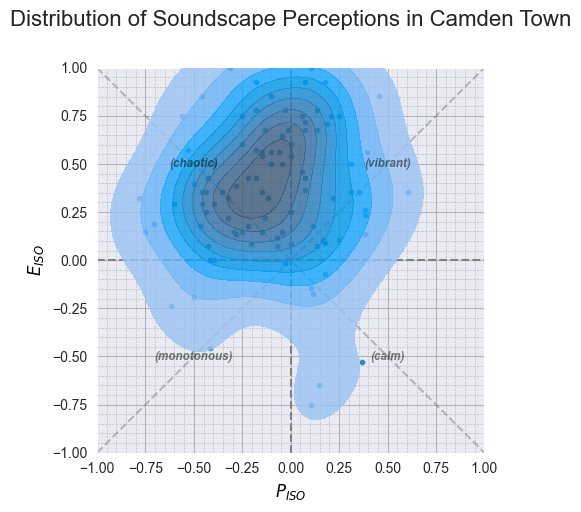

In [6]:
# Filter data for a specific location
location_data = isd.select_location_ids(data, "CamdenTown")

# Calculate ISO coordinates if not already present
if (
    "ISOPleasant" not in location_data.columns
    or "ISOEventful" not in location_data.columns
):
    location_data = sspy.surveys.add_iso_coords(location_data)

# Create a scatter plot with density contours
sspy.iso_plot(
    location_data,
    title="Distribution of Soundscape Perceptions in Camden Town",
    plot_layers=["scatter", "density"],
    diagonal_lines=True,
)

### Interpreting Distribution Plots

In the plot above, each point represents one person's perception of the soundscape. The density contours show where perceptions are concentrated. From this visualization, we can observe:

- The overall position of the distribution in the circumplex (which quadrant it falls in)
- The spread of the distribution (how much variation there is in perceptions)
- The shape of the distribution (whether it's symmetric, skewed, or multimodal)

This type of analysis provides much richer information than simple averages. For example, a location with a bimodal distribution might indicate that the soundscape is perceived very differently by different groups of people, which could be important for planning and design decisions.

## 7. The Soundscape Perception Index (SPI)

The Soundscape Perception Index (SPI) is a metric developed to quantify the similarity between a measured soundscape perception and a target or ideal perception. It's based on the statistical comparison of distributions in the ISO coordinate space.

The SPI ranges from 0 to 100, where:
- 100 indicates perfect similarity to the target distribution
- 0 indicates complete dissimilarity

This index is useful for:
- Evaluating the success of soundscape interventions
- Comparing soundscapes across different locations
- Setting quantitative targets for soundscape design

The SPI is calculated using a two-sample Kolmogorov-Smirnov test, which measures the maximum difference between two cumulative distribution functions.

## Summary

In this tutorial, we've covered the fundamental concepts and terminology of soundscape analysis:

1. **Soundscape Definition**: The acoustic environment as perceived by people in context
2. **ISO 12913 Standard**: The international framework for soundscape assessment
3. **Perceptual Attributes (PAQs)**: The eight scales used to evaluate soundscapes
4. **Circumplex Model**: The two-dimensional model organizing soundscape perception
5. **ISO Coordinates**: The mathematical representation of a soundscape's position in the circumplex
6. **Distribution Analysis**: The importance of considering the full range of perceptions
7. **Soundscape Perception Index**: A metric for comparing soundscape distributions

With this foundation, you're now ready to dive deeper into the practical aspects of soundscape analysis using Soundscapy. In the next tutorial, we'll explore how to work with soundscape survey data in more detail.

## References

1. ISO 12913-1:2014. Acoustics — Soundscape — Part 1: Definition and conceptual framework.
2. ISO 12913-2:2018. Acoustics — Soundscape — Part 2: Data collection and reporting requirements.
3. ISO 12913-3:2019. Acoustics — Soundscape — Part 3: Data analysis.
4. Mitchell, A., Aletta, F., & Kang, J. (2022). How to analyse and represent quantitative soundscape data. JASA Express Letters, 2, 37201. https://doi.org/10.1121/10.0009794
5. Aletta, F., Oberman, T., Mitchell, A., Erfanian, M., Lionello, M., Kachlicka, M., & Kang, J. (2019). Associations between soundscape experience and self-reported wellbeing in open public urban spaces: a field study. The Lancet, 394, S17.
6. Axelsson, Ö., Nilsson, M. E., & Berglund, B. (2010). A principal components model of soundscape perception. The Journal of the Acoustical Society of America, 128(5), 2836-2846.